In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайных данных
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [35]:
#y

In [37]:
# Начальные значения параметров
a_n = np.random.randn()
b_n = np.random.randn()
learning_rate = 0.1
m = len(X)

# Хранение значений параметров для визуализации
a_history = [a_n]
b_history = [b_n]

# Стохастический градиентный спуск
for i in range(20):
    rand_index = np.random.randint(m)
    x_i = X[rand_index, 0]
    y_i = y[rand_index, 0]
    y_pred = a_n * x_i + b_n
    error = y_pred - y_i
    a_gradient = 2 * x_i * error
    b_gradient = 2 * error
    a_n = a_n - learning_rate * a_gradient
    b_n = b_n - learning_rate * b_gradient
    a_history.append(a_n)
    b_history.append(b_n)

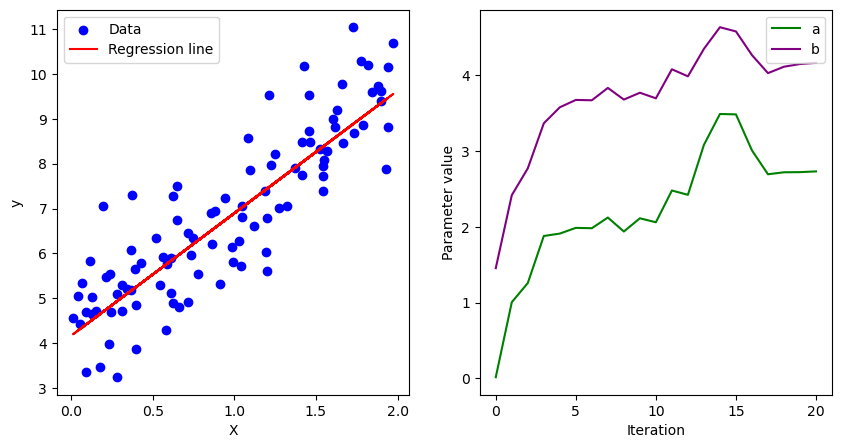

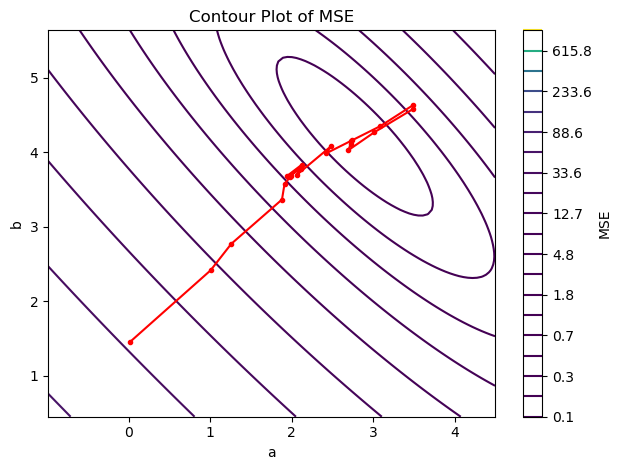

In [40]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, a_n * X + b_n, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(a_history, label='a', color='green')
plt.plot(b_history, label='b', color='purple')
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.legend()
plt.show()


a_vals = np.linspace(min(a_history) - 1, max(a_history) + 1, 100)
b_vals = np.linspace(min(b_history) - 1, max(b_history) + 1, 100)
A, B = np.meshgrid(a_vals, b_vals)
Z = np.zeros_like(A)

for i in range(len(A)):
    for j in range(len(B)):
        y_pred = A[i, j] * X + B[i, j]
        Z[i, j] = np.mean((y - y_pred) ** 2)

plt.contour(A, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
plt.plot(a_history, b_history, 'ro-', markersize=3)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Contour Plot of MSE')
plt.colorbar(label='MSE')

plt.tight_layout()
plt.show()